In [1]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json
ans=[None]*5

In [2]:
#Download Dataset from https://www.kaggle.com/uciml/zoo-animal-classification
data = pd.read_csv('zoo.csv')
animals = pd.read_csv('class.csv')

In [3]:
#Import the dataset and define the feature as well as the target datasets / columns 
X = data.loc[:, data.columns != 'class_type']
y = data.loc[:, data.columns == 'class_type']
#We drop the animal names since this is not a good feature to split the data on  
X = X.loc[:, X.columns != 'animal_name']
X = np.array(X)
y = np.array(y)

In [4]:
#Write a function to find the entropy on a split "target_col"
def entropy(target_col):
    #target column as a pandas dataframe is taken as an argument
    vals={}
    col = np.array(target_col)
    col = col.ravel()
    l = col.size
    a = []
    size=0
    for val in col:
        if val in vals.keys():
            a[vals[val]] = a[vals[val]]+1
        else:
            vals[val] = size
            a.append(1)
            size = size+1
    a = np.array(a)
    a = a/l
    log_array = np.log2(a)
    g = np.multiply(log_array, a)
    res = -np.sum(g)
    return res

In [5]:
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']
#Find the entropy of all the features in the dataset
entropy_value = {}
for feature in feature_names:
    column = data.loc[:, data.columns == feature]
    entropy_value[feature] = entropy(column)
print(entropy_value)

{'hair': 0.9840304711717018, 'feathers': 0.7179499765002912, 'eggs': 0.9794662187017298, 'milk': 0.9743197211096903, 'airborne': 0.7910662980902585, 'aquatic': 0.9396846718728562, 'predator': 0.9914266810680206, 'toothed': 0.9685867165455516, 'backbone': 0.6761627418829198, 'breathes': 0.7374895672137456, 'venomous': 0.3993820824245975, 'fins': 0.653839880626333, 'legs': 2.0338113440641234, 'tail': 0.8228368841492257, 'domestic': 0.5538976334852962, 'catsize': 0.9880162151534646}


In [6]:
#Find the entropy of the feature "toothed"
ans[0]=entropy_value["toothed"]

In [7]:
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(data,split_attribute_name,target_name="class"):       
    #Calculate the entropy of the total dataset  
    col = data.loc[:, data.columns == split_attribute_name]
    target = data.loc[:, data.columns == target_name]
    original_entropy = entropy(target)
    #Calculate the values and the corresponding counts for the split attribute   
    split = {}
    split_count = {}
    array_col = np.array(col).ravel()
    array_target = np.array(target).ravel()
    total_size = array_col.size
    i=0
    for attribute in array_col:
        if attribute in split.keys():
            split[attribute].append(array_target[i])
        else:
            a = []
            split[attribute] = a
            split[attribute].append(array_target[i])
            split_count[attribute] = 0
        i=i+1
        split_count[attribute] = split_count[attribute] + 1
    #Calculate the weighted entropy 
    entropies = []
    weights = []
    for attribute in split:
        df = pd.DataFrame(split[attribute])
        entropies.append(entropy(df))
        weights.append(split_count[attribute]/total_size)
    entropies = np.array(entropies)
    weights = np.array(weights)
    weighted_entropies = np.multiply(entropies, weights)
    #Calculate the information gain  
    info_gain = original_entropy - np.sum(weighted_entropies)
    return info_gain

In [8]:
#Find the information gain having split attribute "hair" and the target feature name "milk"
ans[1]=InfoGain(data, "hair", "milk")

In [9]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
IG = {}
for target in feature_names:
    if target == 'milk':
        continue
    else:
        IG[target] = InfoGain(data, "milk", target)
for target in IG:
    print("Information Gain taking milk as split attribute and {target_name} as target feature = {val}".format(target_name = target, val = IG[target]))
        

Information Gain taking milk as split attribute and hair as target feature = 0.6599660577558698
Information Gain taking milk as split attribute and feathers as target feature = 0.17242769884415887
Information Gain taking milk as split attribute and eggs as target feature = 0.7870598185734241
Information Gain taking milk as split attribute and airborne as target feature = 0.11370352314621812
Information Gain taking milk as split attribute and aquatic as target feature = 0.10181386403185955
Information Gain taking milk as split attribute and predator as target feature = 0.0006367772440212249
Information Gain taking milk as split attribute and toothed as target feature = 0.3465412540071715
Information Gain taking milk as split attribute and backbone as target feature = 0.15262359382508262
Information Gain taking milk as split attribute and breathes as target feature = 0.18259765312929555
Information Gain taking milk as split attribute and venomous as target feature = 0.06284178150207947
I

In [10]:
#Import Decision Tree Classifier from sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#Split the given data into 80 percent training data and 20 percent testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

In [11]:
#Fit the given data
X_train = np.array(X_train)
y_train = np.array(y_train)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
#Make a prediction on the test data and return the percentage of accuracy
from sklearn.metrics import accuracy_score
X_test =  np.array(X_test)
y_test = np.array(y_test)
y_pred = tree.predict(X_test)
ans[2]=accuracy_score(y_test, y_pred)*100
ans[2]

100.0

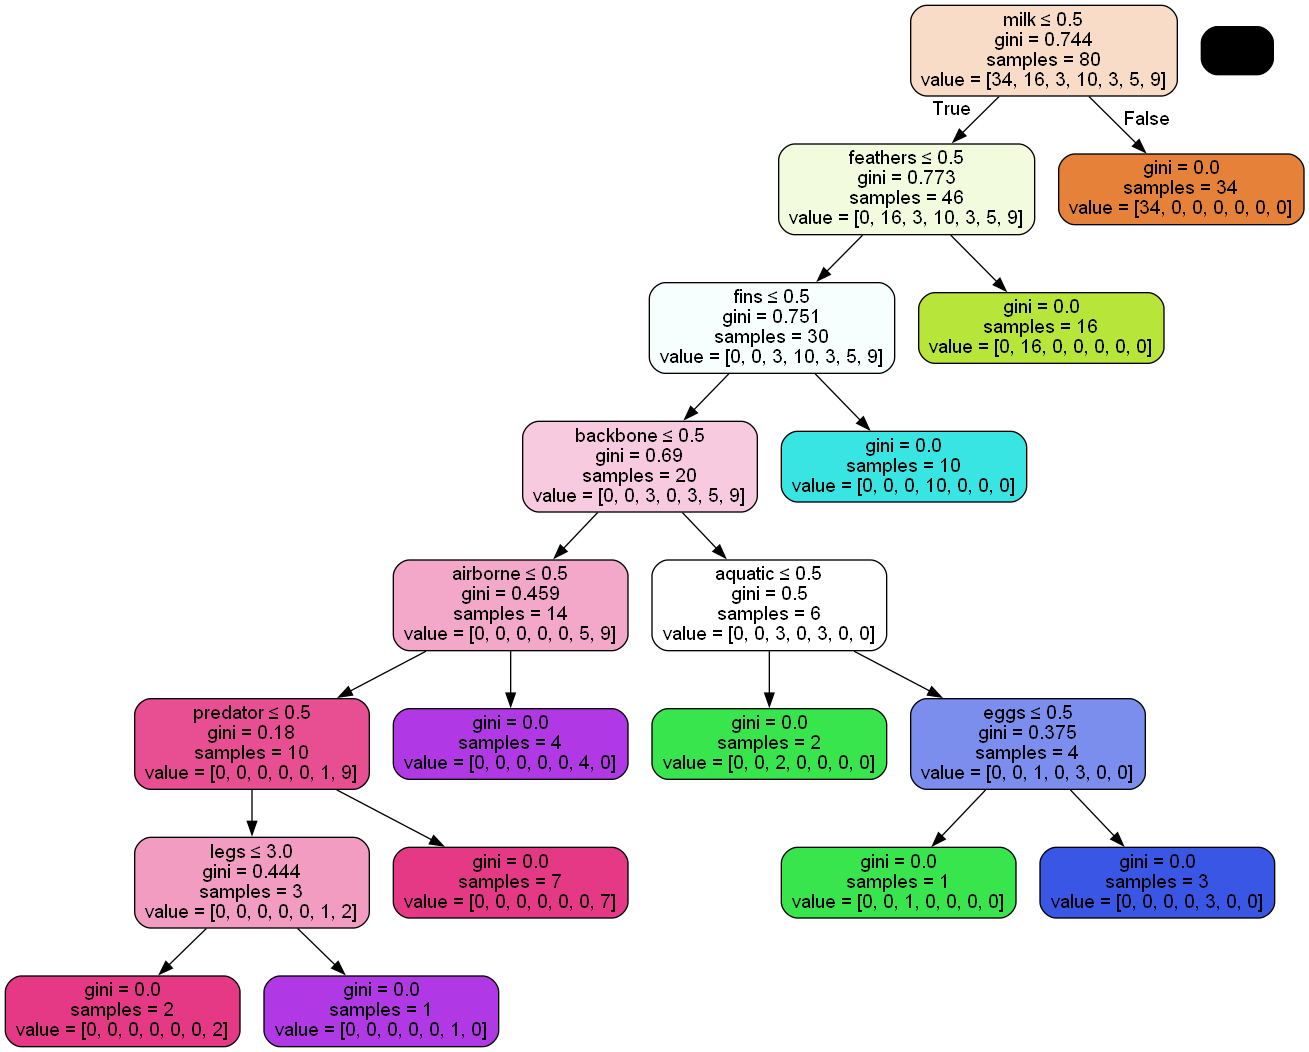

In [13]:
#Run this cell to visualize the decision tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
#Use sklearn to make a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [15]:
#Find the recall,f1-score for class type '3'
from sklearn.metrics import f1_score
fscore = f1_score(y_test, y_pred, average = None)
ans[3]=fscore[2]
print(ans[3])

1.0


In [16]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
...
...
...

In [17]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4]=

SyntaxError: invalid syntax (2688065490.py, line 2)

In [ ]:
ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)
! ~/submit